In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [33]:
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Data/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Output hidden; open in https://colab.research.google.com to view.

In [34]:

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))

            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [35]:
dir = "/content/drive/MyDrive/Data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1


for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [36]:

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
Name: count, dtype: int64

In [37]:
image_list[0].shape

(256, 256, 3)

In [38]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [40]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [41]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                

In [45]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [46]:

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [47]:

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 42s 8s/step - loss: 1.0330 - accuracy: 0.4306 - val_loss: 0.9237 - val_accuracy: 0.6736
Epoch 2/50
5/5 [==============================] - 30s 6s/step - loss: 0.8833 - accuracy: 0.7014 - val_loss: 0.7980 - val_accuracy: 0.8958
Epoch 3/50
5/5 [==============================] - 31s 6s/step - loss: 0.7516 - accuracy: 0.8958 - val_loss: 0.7263 - val_accuracy: 0.8403
Epoch 4/50
5/5 [==============================] - 31s 6s/step - loss: 0.6428 - accuracy: 0.8993 - val_loss: 0.5988 - val_accuracy: 0.9306
Epoch 5/50
5/5 [==============================] - 30s 6s/step - loss: 0.5482 - accuracy: 0.9219 - val_loss: 0.5335 - val_accuracy: 0.8819
Epoch 6/50
5/5 [==============================] - 30s 6s/step - loss: 0.4751 - accuracy: 0.9201 - val_loss: 0.4446 - val_accuracy: 0.9306
Epoch 7/50
5/5 [==============================] - 34s 7s/step - loss: 0.4044 - accuracy: 0.9323 - val_loss: 0.4074 - val_accuracy: 0.9167
Epoch 8/50
5/5 [==================

In [48]:
model.save("/content/drive/My Drive/plant_disease.h5")

json_model = model.to_json()

with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)

model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


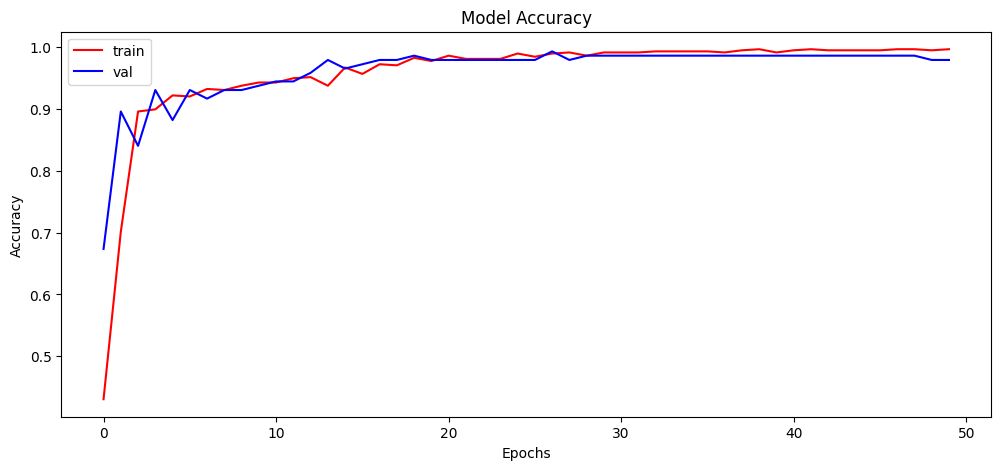

In [49]:

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [50]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 412ms/step - loss: 0.0255 - accuracy: 0.9944
Test Accuracy: 99.44444298744202


In [51]:
y_pred = model.predict(x_test)

6/6 [==============================] - 3s 405ms/step


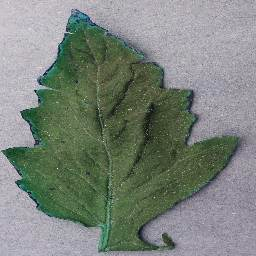

In [61]:

img = array_to_img(x_test[10])
img

In [62]:

print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
